In [22]:
import pandas as pd

# Load the datasets
demographics_path = 'Demographics.csv'
transactions_path = 'Transactions.csv'

demographics_df = pd.read_csv(demographics_path)
transactions_df = pd.read_csv(transactions_path)

# Display the first few rows of each dataframe to understand their structure
demographics_df.head()


,customer_id,PostalCode,Gender,YOB,MaritalStatus,HasChildren,NumChildren,City,Population_K,HouseHolds,HHAveSize,Pop0_25,Pop26_45,Pop46_55,Pop56_65,PopOver65,HHIncomeMed,WhtCollarOcc,BluCollarOcc
0,C0100427157,A000003,M,1975,M,N,1,Chicago,623,277,2.2,31.7,29.8,13.1,10.0,15.3,36405.0,22.0,68.0
1,C0104914828,A000003,F,1992,M,Y,1,Chicago,623,277,2.2,31.7,29.8,13.1,10.0,15.3,36405.0,22.0,68.0
2,C0101482495,A000003,M,1998,NaN,N,3,Chicago,623,277,2.2,31.7,29.8,13.1,10.0,15.3,36405.0,22.0,68.0
3,C0100634627,A000004,F,1984,S,Y,2,Chicago,684,292,2.3,31.5,30.0,13.1,10.0,15.3,38211.0,40.0,53.0
4,C0100594701,A000004,F,1984,M,Y,5,Chicago,684,292,2.3,31.5,30.0,13.1,10.0,15.3,38211.0,40.0,53.0


In [23]:
transactions_df.head()

,customer_id,trans_dt,trans_id,item_code,prod_cat,nbr_items,amount,payment_method,channel
0,C0105188593,1/1/2015,T10000279,I0000000058,A,1,8.99,CC,dm
1,C0100776494,1/1/2015,T10000137,I0000000164,C,1,44.99,DC,dm
2,C0101408153,1/1/2015,T10000256,I0000000120,B,1,14.99,DC,paid_search
3,C0100661343,1/1/2015,T10000383,I0000000045,A,1,8.99,CC,dm
4,C0102938785,1/1/2015,T10000018,I0000000781,D,1,179.00,CC,direct


In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Preprocessing Demographics Data
# Handle missing values
demographics_df.fillna({
    'MaritalStatus': 'Unknown',
    'NumChildren': 0
}, inplace=True)


In [25]:
# Encode categorical variables
categorical_cols = ['PostalCode', 'Gender', 'MaritalStatus', 'HasChildren', 'City']
le = LabelEncoder()
for col in categorical_cols:
    demographics_df[col] = le.fit_transform(demographics_df[col])


In [26]:
# Standardize numerical features
numerical_cols = ['YOB', 'NumChildren', 'Population_K', 'HouseHolds', 'HHAveSize', 'Pop0_25', 'Pop26_45', 
                  'Pop46_55', 'Pop56_65', 'PopOver65', 'HHIncomeMed', 'WhtCollarOcc', 'BluCollarOcc']
scaler = StandardScaler()
demographics_df[numerical_cols] = scaler.fit_transform(demographics_df[numerical_cols])


In [27]:
# Preprocessing Transactions Data
# Convert transaction date to datetime
transactions_df['trans_dt'] = pd.to_datetime(transactions_df['trans_dt'], format='%m/%d/%Y')


In [28]:
# Encode categorical variables in transactions data
categorical_cols_trans = ['prod_cat', 'payment_method', 'channel']
for col in categorical_cols_trans:
    transactions_df[col] = le.fit_transform(transactions_df[col])


In [29]:
# Aggregating transaction data by customer
agg_transactions_df = transactions_df.groupby('customer_id').agg({
    'nbr_items': 'sum',
    'amount': 'sum'
}).reset_index()


In [30]:
# Standardize transaction features
scaler = StandardScaler()
agg_transactions_df[['nbr_items', 'amount']] = scaler.fit_transform(agg_transactions_df[['nbr_items', 'amount']])


In [31]:
# Merging datasets
merged_df = pd.merge(demographics_df, agg_transactions_df, on='customer_id', how='inner')
merged_df.head()

,customer_id,PostalCode,Gender,YOB,MaritalStatus,HasChildren,NumChildren,City,Population_K,HouseHolds,...,Pop0_25,Pop26_45,Pop46_55,Pop56_65,PopOver65,HHIncomeMed,WhtCollarOcc,BluCollarOcc,nbr_items,amount
0,C0101482495,0,1,1.701975,2,0,1.372071,1,-0.128920,0.048292,...,-1.503376,-1.072013,0.756935,-0.033063,2.251169,-1.169472,-1.329761,1.384772,-0.362086,-0.273377
1,C0100634627,1,0,1.020606,1,1,0.649477,1,0.268379,0.279420,...,-2.472678,-0.005727,0.756935,-0.033063,2.251169,-1.063620,0.732803,-0.193350,-0.543822,-1.065936
2,C0100594701,1,0,1.020606,0,1,2.817259,1,0.268379,0.279420,...,-2.472678,-0.005727,0.756935,-0.033063,2.251169,-1.063620,0.732803,-0.193350,-0.362086,-0.302408
3,C0105231010,3,0,0.825929,0,1,1.372071,1,-0.676020,-0.691318,...,-0.534073,0.527417,0.037641,0.669411,-1.394819,0.773361,-0.413066,0.858731,-0.452954,-0.723335
4,C0101923201,3,0,-1.704871,0,0,-0.795711,1,-0.676020,-0.691318,...,-0.534073,0.527417,0.037641,0.669411,-1.394819,0.773361,-0.413066,0.858731,-0.362086,-0.446114


In [32]:
merged_df.tail()

,customer_id,PostalCode,Gender,YOB,MaritalStatus,HasChildren,NumChildren,City,Population_K,HouseHolds,...,Pop0_25,Pop26_45,Pop46_55,Pop56_65,PopOver65,HHIncomeMed,WhtCollarOcc,BluCollarOcc,nbr_items,amount
32195,C0105511251,31312,0,0.533913,1,1,0.649477,3,1.076003,0.849536,...,-1.503376,-0.005727,0.037641,-0.033063,2.251169,-0.454185,-1.902696,1.805604,-0.271218,0.066263
32196,C0102552688,31313,0,1.458629,0,1,-0.073117,3,-0.461087,-0.521824,...,-0.049422,-0.005727,-0.681653,-0.033063,1.521972,-0.162244,-0.756827,0.858731,-0.362086,-0.824975
32197,C0100624761,31314,0,1.069275,2,0,-0.795711,3,-0.864899,-0.829994,...,-0.534073,-0.005727,-0.681653,1.371884,0.792774,0.311625,-1.444348,0.963939,0.546593,1.176455
32198,C0101904214,31314,1,1.020606,0,1,-0.073117,3,-0.864899,-0.829994,...,-0.534073,-0.005727,-0.681653,1.371884,0.792774,0.311625,-1.444348,0.963939,-0.362086,-0.819342
32199,C0106097239,31315,1,1.458629,0,1,0.649477,3,1.414684,1.203932,...,-0.049422,-1.072013,-0.681653,0.669411,0.792774,-0.219800,0.274455,-0.824599,-0.362086,-0.447565


In [33]:
#saving the merged dataset
merged_df.to_csv('merged_df.csv', index=False)

In [37]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns for encoding
categorical_columns = ['Gender', 'MaritalStatus', 'City']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Perform OneHotEncoding on categorical columns
encoded_features = encoder.fit_transform(merged_df[categorical_columns])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and concatenate the encoded features
data_encoded = pd.concat([merged_df.drop(columns=categorical_columns), encoded_df], axis=1)

# Display the first few rows of the encoded dataset
data_encoded.head()


C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,customer_id,PostalCode,YOB,HasChildren,NumChildren,Population_K,HouseHolds,HHAveSize,Pop0_25,Pop26_45,...,WhtCollarOcc,BluCollarOcc,nbr_items,amount,Gender_1,MaritalStatus_1,MaritalStatus_2,City_1,City_2,City_3
0,C0101482495,0,1.701975,0,1.372071,-0.128920,0.048292,-1.870286,-1.503376,-1.072013,...,-1.329761,1.384772,-0.362086,-0.273377,1.0,0.0,1.0,1.0,0.0,0.0
1,C0100634627,1,1.020606,1,0.649477,0.268379,0.279420,-0.599652,-2.472678,-0.005727,...,0.732803,-0.193350,-0.543822,-1.065936,0.0,1.0,0.0,1.0,0.0,0.0
2,C0100594701,1,1.020606,1,2.817259,0.268379,0.279420,-0.599652,-2.472678,-0.005727,...,0.732803,-0.193350,-0.362086,-0.302408,0.0,0.0,0.0,1.0,0.0,0.0
3,C0105231010,3,0.825929,1,1.372071,-0.676020,-0.691318,0.670982,-0.534073,0.527417,...,-0.413066,0.858731,-0.452954,-0.723335,0.0,0.0,0.0,1.0,0.0,0.0
4,C0101923201,3,-1.704871,0,-0.795711,-0.676020,-0.691318,0.670982,-0.534073,0.527417,...,-0.413066,0.858731,-0.362086,-0.446114,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
from sklearn.preprocessing import StandardScaler

# Identify features to be scaled (excluding customer_id)
features_to_scale = data_encoded.drop(columns=['customer_id'])

In [39]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [40]:
# Fit and transform the data
scaled_features = scaler.fit_transform(features_to_scale)

In [41]:
# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

In [42]:
# Display the first few rows of the scaled dataset
scaled_df.head()


,PostalCode,YOB,HasChildren,NumChildren,Population_K,HouseHolds,HHAveSize,Pop0_25,Pop26_45,Pop46_55,...,WhtCollarOcc,BluCollarOcc,nbr_items,amount,Gender_1,MaritalStatus_1,MaritalStatus_2,City_1,City_2,City_3
0,-1.695106,1.695198,-1.012186,1.298829,-0.118553,0.059095,-1.867788,-1.514601,-1.123501,0.756741,...,-1.329646,1.384617,-0.360277,-0.269467,1.002239,-0.706646,1.399648,1.485333,-0.646773,-0.359927
1,-1.694997,1.014016,0.987961,0.598147,0.280107,0.290964,-0.595598,-2.487338,-0.008656,0.756741,...,0.730382,-0.187546,-0.543021,-1.093017,-0.997766,1.415136,-0.714465,1.485333,-0.646773,-0.359927
2,-1.694997,1.014016,0.987961,2.700193,0.280107,0.290964,-0.595598,-2.487338,-0.008656,0.756741,...,0.730382,-0.187546,-0.360277,-0.299634,-0.997766,-0.706646,-0.714465,1.485333,-0.646773,-0.359927
3,-1.694779,0.819393,0.987961,1.298829,-0.667527,-0.682887,0.676592,-0.541863,0.548767,0.036504,...,-0.414078,0.860563,-0.451649,-0.737020,-0.997766,-0.706646,-0.714465,1.485333,-0.646773,-0.359927
4,-1.694779,-1.710710,-1.012186,-0.803216,-0.667527,-0.682887,0.676592,-0.541863,0.548767,0.036504,...,-0.414078,0.860563,-0.360277,-0.448959,-0.997766,-0.706646,-0.714465,1.485333,-0.646773,-0.359927


In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [44]:
# Fit and transform the data
scaled_df = scaler.fit_transform(features_to_scale)


In [45]:
# Apply PCA to reduce the dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_df)


In [46]:
# Convert the PCA features to a DataFrame
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])


In [47]:
# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.08908098 0.08177086]


In [48]:
# Apply the Elbow Method to determine the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)


C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vedan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\vedan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\vedan\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^

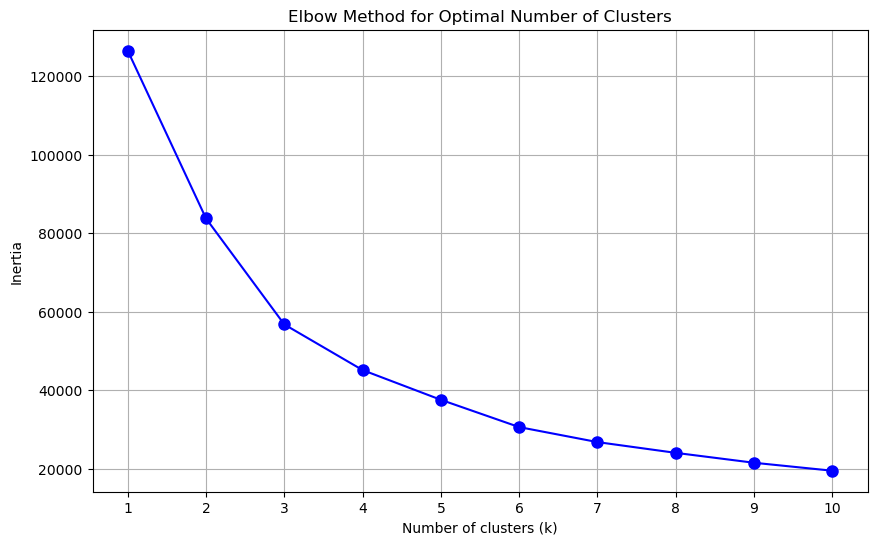

In [49]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(K)
plt.grid(True)
plt.show()


In [50]:
# Apply PCA to reduce the dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_df)


In [51]:
# Convert the PCA features to a DataFrame
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])


In [52]:
# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_df)


C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [53]:
# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans.labels_


In [54]:
# Display the first few rows of the PCA DataFrame with cluster labels
print(pca_df.head())


       PCA1      PCA2  Cluster
0 -1.101932 -1.551836        2
1 -0.355573  0.887055        2
2 -0.427854  1.010099        2
3  0.146167 -0.826136        0
4  0.199452 -0.958446        0


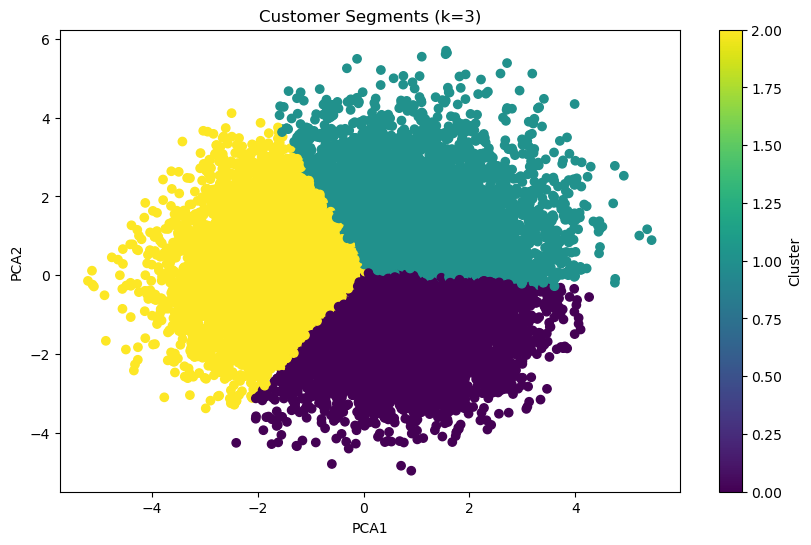

In [56]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Customer Segments (k=3)')
plt.colorbar(label='Cluster')
plt.show()

In [70]:
demographics_df['Cluster'] = kmeans.labels_

ValueError: Length of values (32200) does not match length of index (74852)

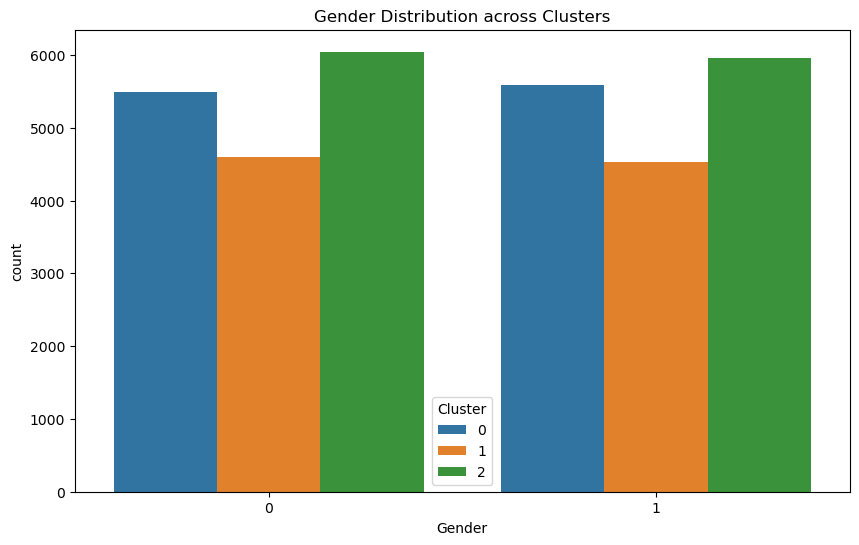

In [67]:
# Visualize demographics data within clusters
# Example visualizations:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Cluster', data=merged_df)
plt.title('Gender Distribution across Clusters')
plt.show()

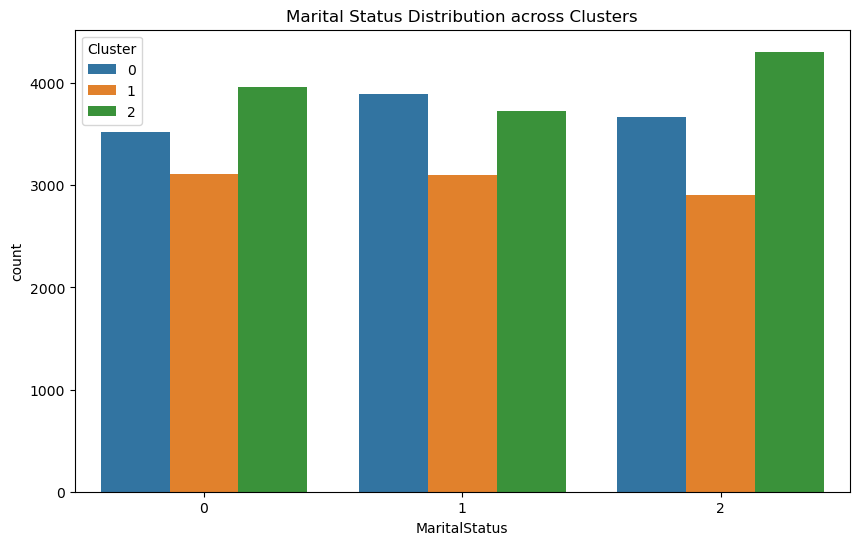

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Cluster', data=merged_df)
plt.title('Marital Status Distribution across Clusters')
plt.show()